In [1]:
# in this exercise the idea is to deal with classification problem. the idea
# is to predit if the client will subscribe a deposit or not
# in this example I will be focussing on ensemble classifiers in this exercise viz.,
#Radom Forests
#Booststrap Aggregation
#Boosting Algorithms

In [214]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
%matplotlib inline

In [215]:
# loading the data
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\Tree\\bank_full.csv")

In [216]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [217]:
# print the shape of my data
# print the column names
# print the row


In [218]:
print (data.shape)
print (data.shape[0])
print (data.shape[1])
print(data.columns.values)

(45211, 17)
45211
17
['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'Target']


In [219]:
# as we can see, we have 41188 row, 17 columns.

In [220]:
# looking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [221]:
# by using the data.info(). we can see names of all columns and their data type. for example. age has dtype object

In [222]:
# now I will check if my data has missing value or not


In [223]:
#data.isnull().sum()
data.isnull().values.any()
# as we can see we do not have missing values..
# obs: we can use those 2 code above to locking for missing value

False

In [224]:
# as we can see in our data, we have in some columns value that are unknown ,& 'others' 
# so those variable may be lack of information or missing value in that column.
# assuming that those value outlier or are not much helpfull for analyses

In [225]:
# Delete the rows which column 'poutcome' contains 'other'
## explaim better =============================

In [257]:
other= data.poutcome=='other' # explain this code for me
other

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210     True
Name: poutcome, Length: 45211, dtype: bool

In [227]:
data1=data.drop(data[other].index,axis=0,inplace = False)

In [258]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43371 non-null  int64
 1   job        43371 non-null  int8 
 2   marital    43371 non-null  int8 
 3   education  43371 non-null  int8 
 4   default    43371 non-null  int8 
 5   balance    43371 non-null  int64
 6   housing    43371 non-null  int8 
 7   loan       43371 non-null  int8 
 8   contact    43371 non-null  int8 
 9   day        43371 non-null  int64
 10  month      43371 non-null  int8 
 11  duration   43371 non-null  int64
 12  campaign   43371 non-null  int64
 13  pdays      43371 non-null  int64
 14  previous   43371 non-null  int64
 15  poutcome   43371 non-null  int8 
 16  Target     43371 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 3.1 MB


In [229]:
# Step 2: Fill 'unknown' in job and education to 'other'
data1[['job','education']] = data1[['job','education']].replace(['unknown'],'other')

data1.head(10)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [263]:
data1['contact'].value_counts()

0    27648
2    12993
1     2730
Name: contact, dtype: int64

In [230]:
# sumarize my data to see information about statitics 
data1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000
mean,40.986443,1356.963063,15.862904,258.266930,2.776671,32.158954,0.434853
std,10.595454,3030.956348,8.324122,257.950498,3.138053,90.689195,1.559405
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,70.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1417.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,55.000000


In [231]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43371 non-null  int64 
 1   job        43371 non-null  object
 2   marital    43371 non-null  object
 3   education  43371 non-null  object
 4   default    43371 non-null  object
 5   balance    43371 non-null  int64 
 6   housing    43371 non-null  object
 7   loan       43371 non-null  object
 8   contact    43371 non-null  object
 9   day        43371 non-null  int64 
 10  month      43371 non-null  object
 11  duration   43371 non-null  int64 
 12  campaign   43371 non-null  int64 
 13  pdays      43371 non-null  int64 
 14  previous   43371 non-null  int64 
 15  poutcome   43371 non-null  object
 16  Target     43371 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.0+ MB


In [232]:
# do scatterplot to see the distribuition of my data

<AxesSubplot:xlabel='age', ylabel='balance'>

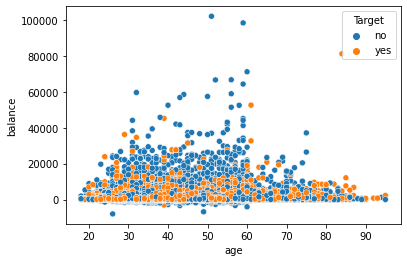

In [233]:
sns.scatterplot(x='age',y='balance',hue='Target',data=data1)

Data Visualisation:


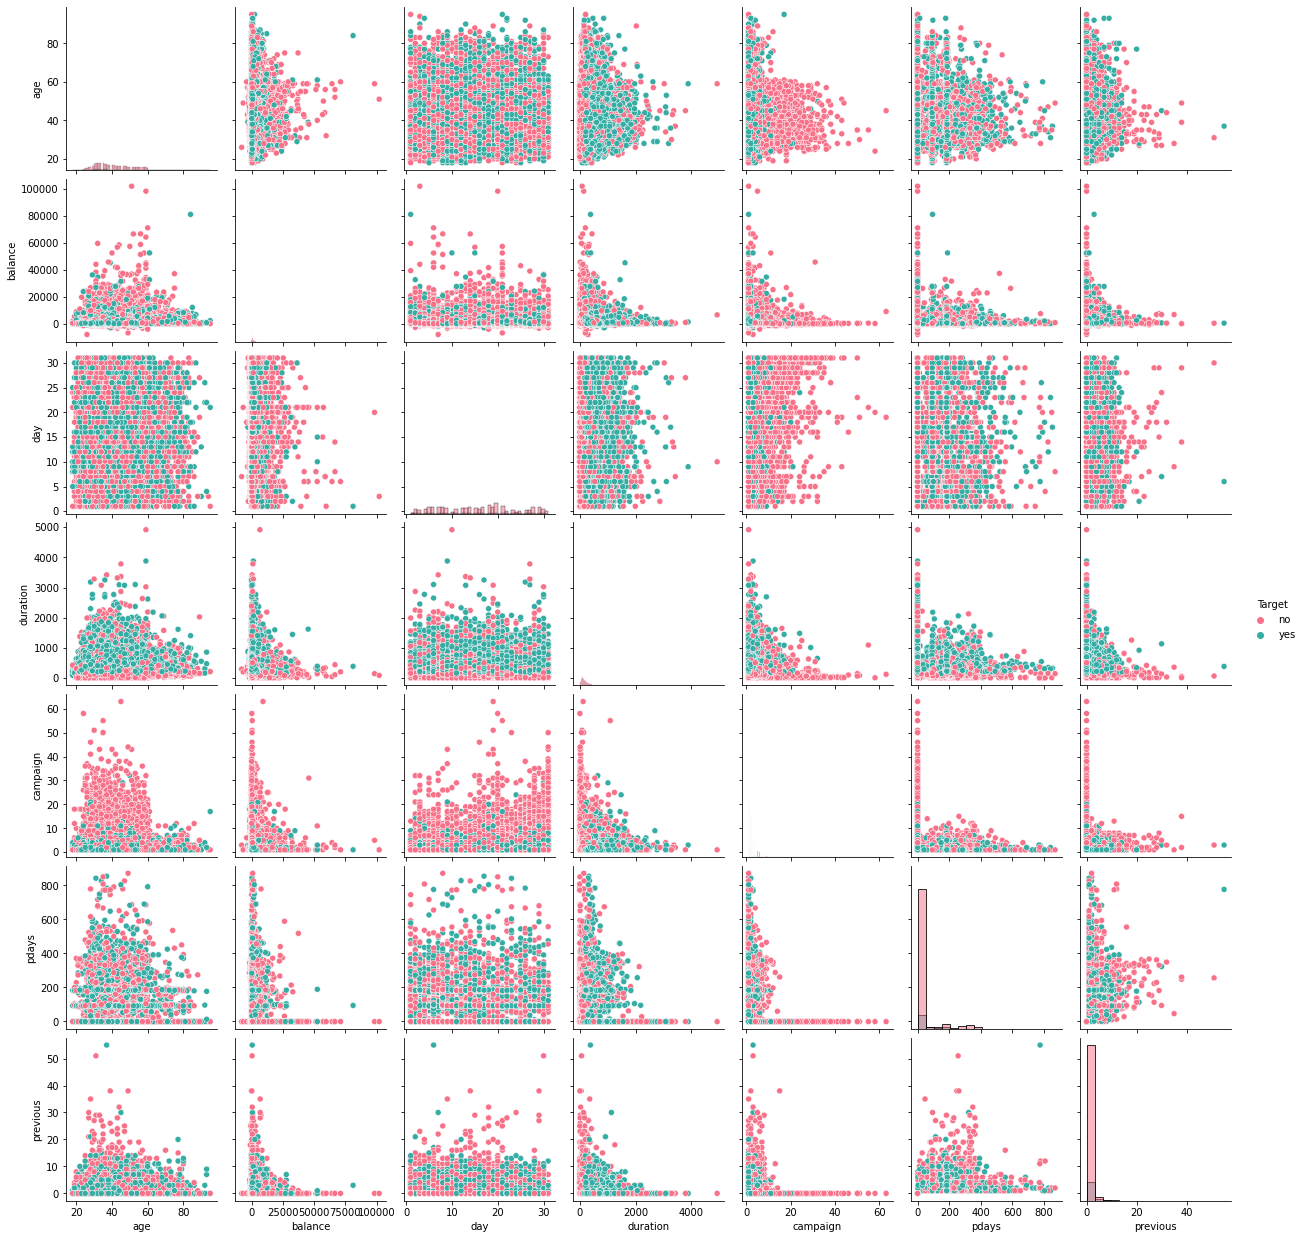

In [234]:
sns.pairplot(data1, hue="Target", diag_kind = 'hist', palette="husl")

In [235]:
# do the correlation to see 


In [236]:
corr=data1.corr()

In [237]:
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.094051,-0.011422,-0.006463,0.003840,-0.007011,0.013018
balance,0.094051,1.000000,0.001217,0.020134,-0.013255,0.004652,0.018805
day,-0.011422,0.001217,1.000000,-0.032632,0.168613,-0.088033,-0.054828
duration,-0.006463,0.020134,-0.032632,1.000000,-0.082664,0.000715,0.005559
campaign,0.003840,-0.013255,0.168613,-0.082664,1.000000,-0.093630,-0.051453
pdays,-0.007011,0.004652,-0.088033,0.000715,-0.093630,1.000000,0.569136
previous,0.013018,0.018805,-0.054828,0.005559,-0.051453,0.569136,1.000000


In [238]:
# do the heat map of correlation matrix to see better correlactionship

<AxesSubplot:>

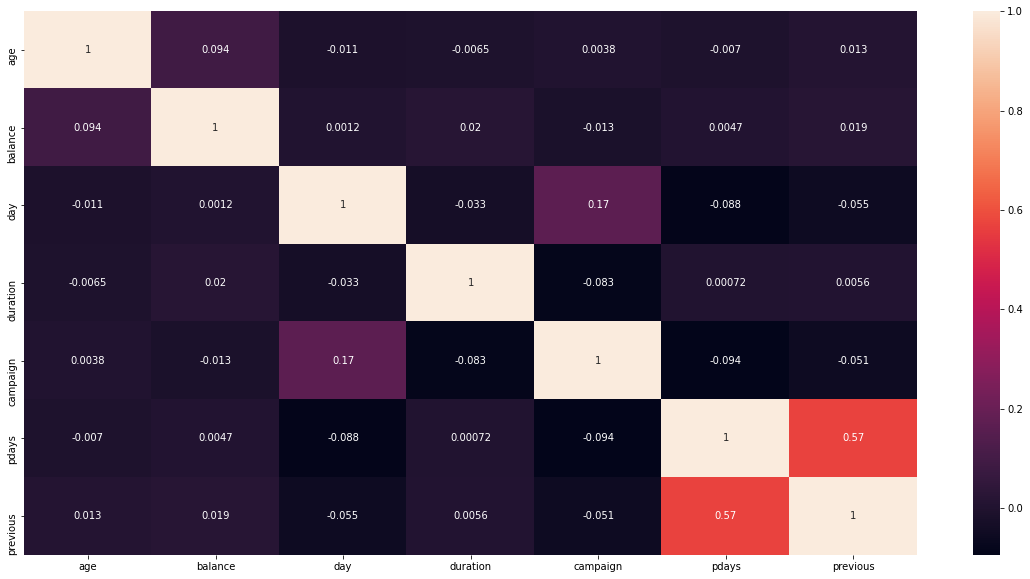

In [239]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

Transformation of Data


In [266]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43371 non-null  int64
 1   job        43371 non-null  int8 
 2   marital    43371 non-null  int8 
 3   education  43371 non-null  int8 
 4   default    43371 non-null  int8 
 5   balance    43371 non-null  int64
 6   housing    43371 non-null  int8 
 7   loan       43371 non-null  int8 
 8   contact    43371 non-null  int8 
 9   day        43371 non-null  int64
 10  month      43371 non-null  int8 
 11  duration   43371 non-null  int64
 12  campaign   43371 non-null  int64
 13  pdays      43371 non-null  int64
 14  previous   43371 non-null  int64
 15  poutcome   43371 non-null  int8 
 16  Target     43371 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 3.1 MB


In [241]:
# Classfication models, Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

In [242]:

for feature in data1.columns: # Loop through all columns in the dataframe
    if data1[feature].dtype == 'object': # Only apply for columns with categorical strings
        data1[feature] = pd.Categorical(data1[feature]).codes # Replace strings with an integer
        
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43371 non-null  int64
 1   job        43371 non-null  int8 
 2   marital    43371 non-null  int8 
 3   education  43371 non-null  int8 
 4   default    43371 non-null  int8 
 5   balance    43371 non-null  int64
 6   housing    43371 non-null  int8 
 7   loan       43371 non-null  int8 
 8   contact    43371 non-null  int8 
 9   day        43371 non-null  int64
 10  month      43371 non-null  int8 
 11  duration   43371 non-null  int64
 12  campaign   43371 non-null  int64
 13  pdays      43371 non-null  int64
 14  previous   43371 non-null  int64
 15  poutcome   43371 non-null  int8 
 16  Target     43371 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 3.1 MB


In [243]:
 data1.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000,43371.000000
mean,40.986443,4.696825,1.165456,2.059164,0.018422,1356.963063,0.551774,0.160914,0.662101,15.862904,5.519679,258.266930,2.776671,32.158954,0.434853,1.739158,0.114869
std,10.595454,3.661037,0.606564,0.779909,0.134475,3030.956348,0.497318,0.367456,0.907137,8.324122,2.989891,257.950498,3.138053,90.689195,1.559405,0.647161,0.318868
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,2.000000,0.000000,70.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,2.000000,0.000000,443.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,2.000000,0.000000
75%,48.000000,8.000000,2.000000,3.000000,0.000000,1417.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.000000,3.000000,-1.000000,0.000000,2.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,55.000000,2.000000,1.000000


In [244]:
X = data1.iloc[:, 0:16].values
X =X.reshape(-1,1)
y = data1.iloc[:, -1].values
y = y.reshape (-1,1)


Splitting of Data into Training and Test Datasets:¶


In [245]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 


In [246]:
#  define my dependent and independent variable


In [247]:
# obs:: question:: why drop contact ?


In [248]:
x=data1.drop(['contact','Target'], axis=1)
y=data1['Target']

In [249]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45205    1
45206    1
45207    1
45208    1
45209    0
Name: Target, Length: 43371, dtype: int8

In [250]:
# Split X and y into training and test set in 70:30 ratio


In [270]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [271]:
print(X_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(30359, 15)
(30359,)
(13012, 15)
(13012,)


Scaling of data to improve the accuracy:


In [272]:
## To have an accurate score, let us create another set of data with scaling function applied to it.

ZX = preprocessing.scale(x) # Why I have to use features scaling in asembly tecniques?
# because ttres is just create tres base in the features, so i think the scaler do not make a lot impact in my result
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

In [273]:
print(ZX_train.shape)

(30359, 15)


In [274]:
print(ZX_train)
#print(X_train)

[[ 0.19004195 -1.2829367  -0.27277927 ... -0.36563712 -0.27886144
   0.40306145]
 [-0.37624519 -0.19033761 -0.27277927 ... -0.36563712 -0.27886144
   0.40306145]
 [-0.09310162 -1.00978693 -0.27277927 ... -0.36563712 -0.27886144
   0.40306145]
 ...
 [-1.2256759   1.44856103 -0.27277927 ... -0.36563712 -0.27886144
   0.40306145]
 [ 0.56756671  0.35596194  1.37587034 ... -0.36563712 -0.27886144
   0.40306145]
 [ 0.75632909 -0.19033761 -0.27277927 ... -0.36563712 -0.27886144
   0.40306145]]


## Apply the Random forest model and print the accuracy of Random forest Model¶


In [276]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(x_test)
rfcl_score=rfcl.score(x_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 0.8949431294189979
The confusion matrix of Random Forest Model is
[[11467    42]
 [ 1325   178]]


## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy¶


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(x_test)
abcl_score=abcl.score(x_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))

## Apply Bagging Classifier Algorithm and print the accuracy


In [211]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl_score=bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Apply GradientBoost Classifier Algorithm for the same data and print the accuracy¶


In [212]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl_score=gbcl.score(x_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Comparision of Models:


In [213]:
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

NameError: name 'rfcl_score' is not defined